In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SEK-11/dataset_excelR/main/DATA/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: >

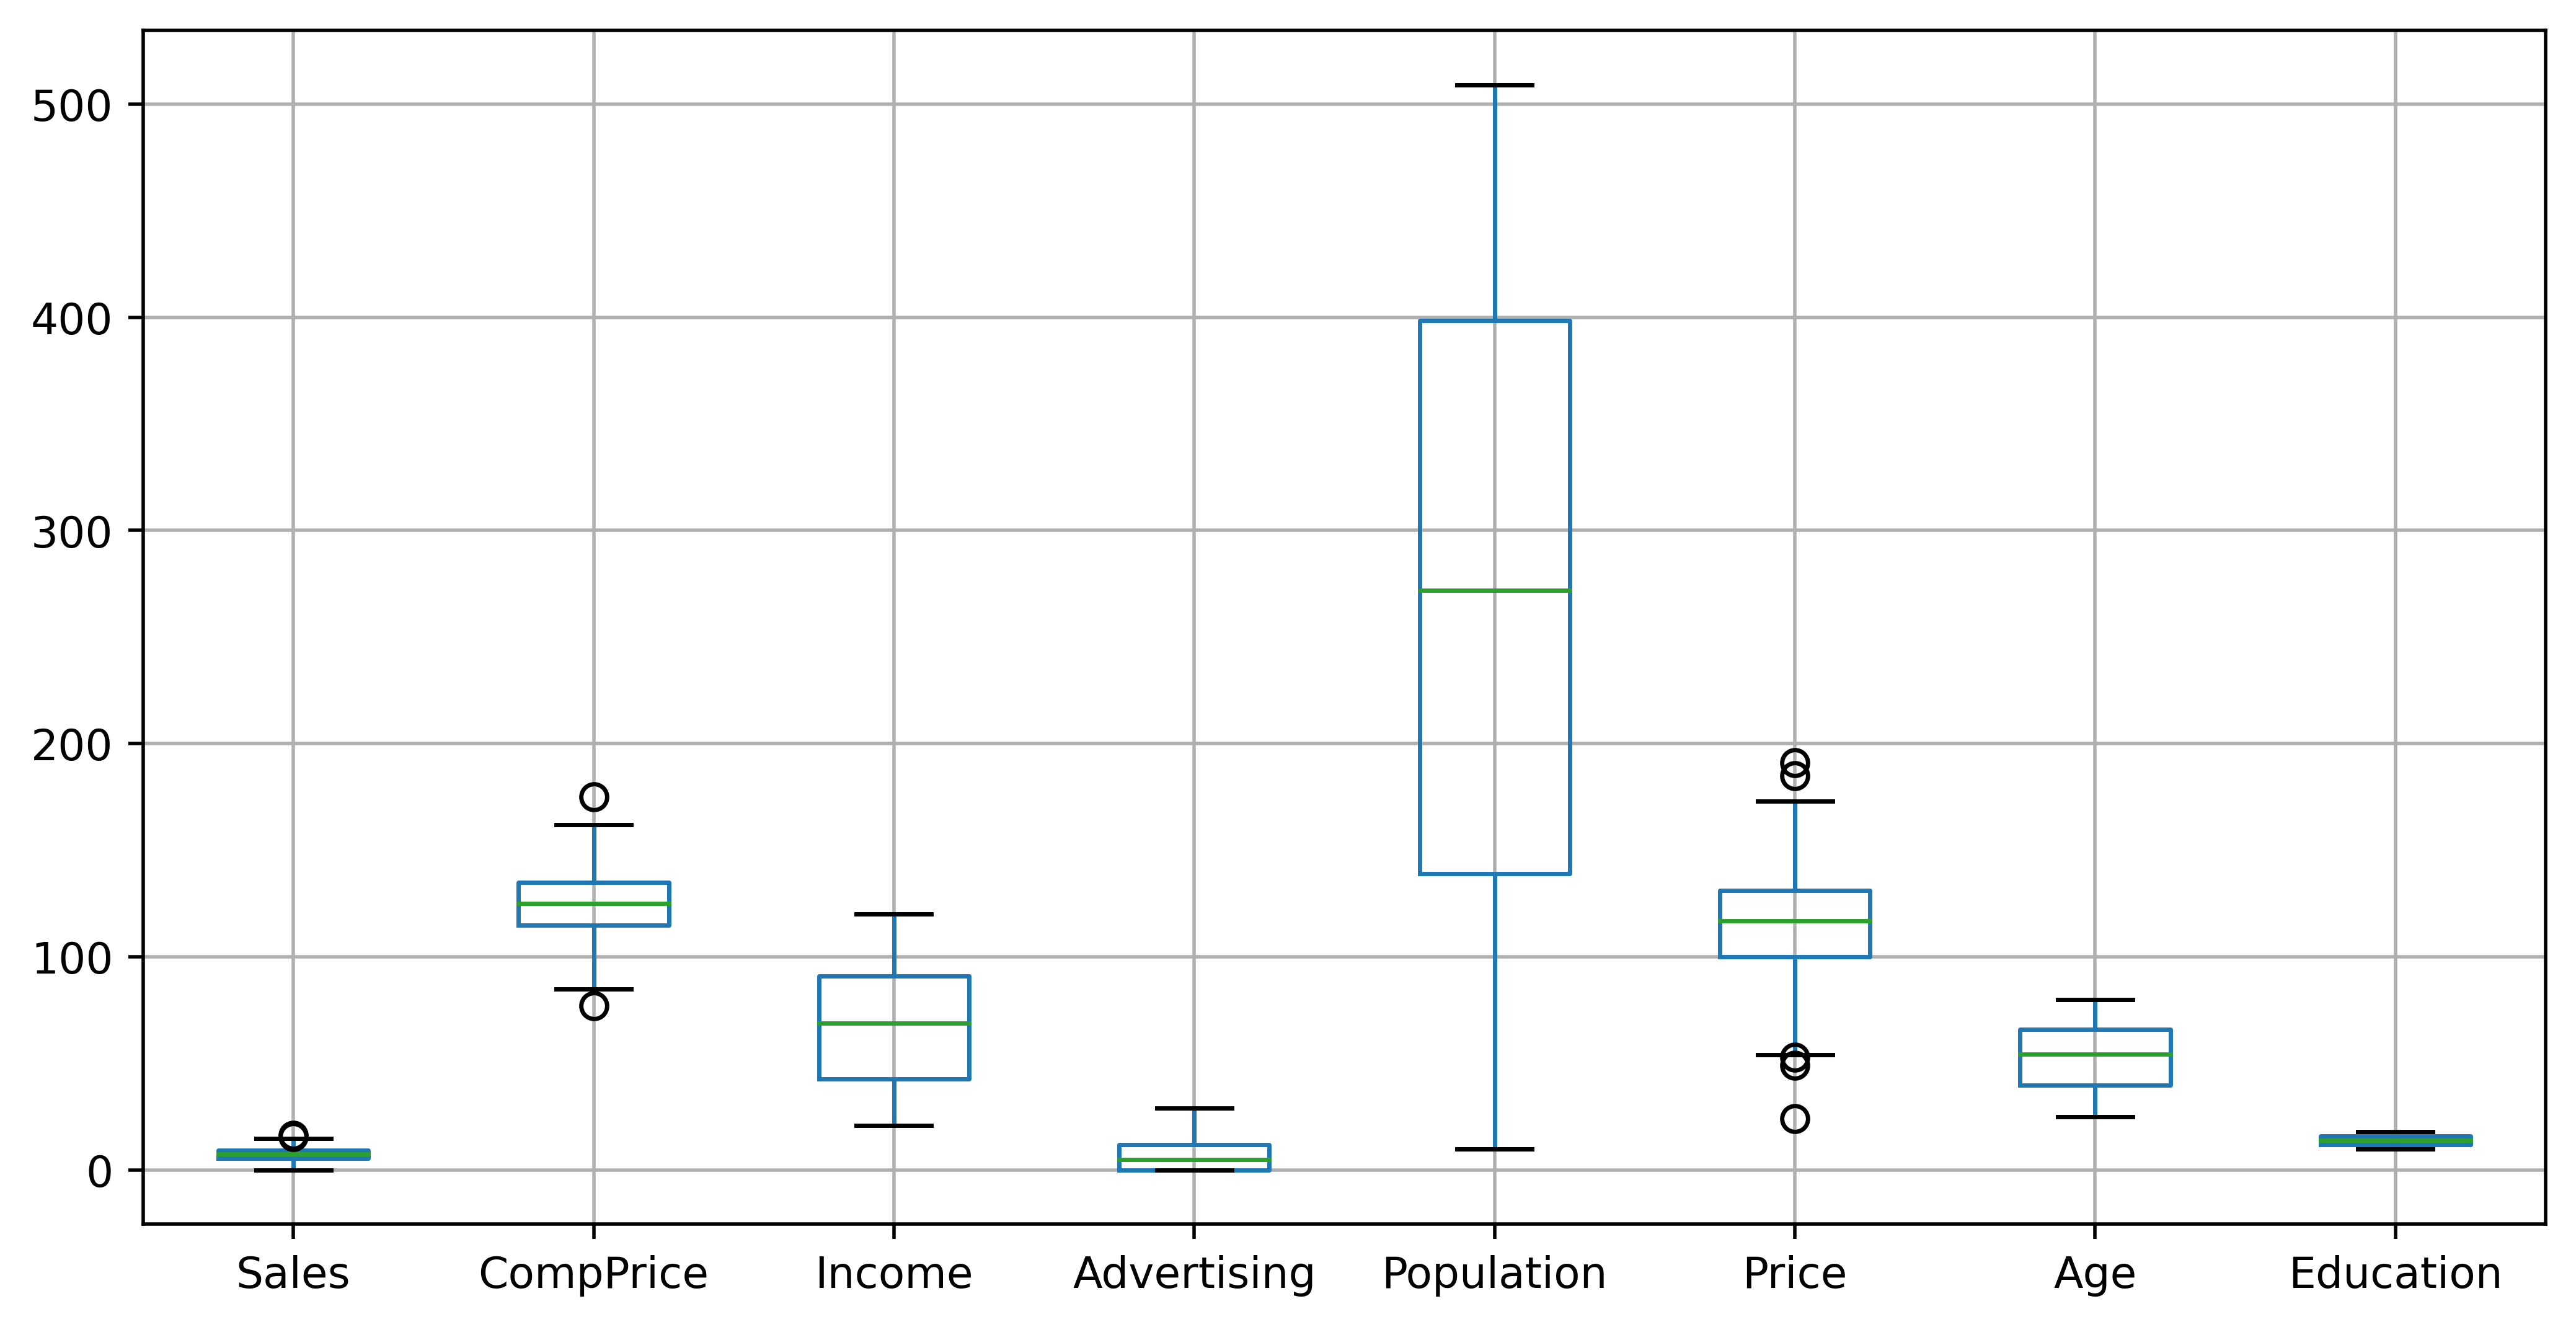

In [7]:
df.boxplot()

In [8]:
def outlier(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)

    iqr = q3 - q1

    lower = q1 - (iqr * 1.5)
    upper = q3 + (iqr * 1.5)

    return lower, upper

In [9]:
outlier(df,"Sales")

(-0.504999999999999, 15.215)

In [10]:
df.loc[df["Sales"] > 15.215, "Sales"] = 15.215

In [11]:
outlier(df,"CompPrice")

(85.0, 165.0)

In [12]:
df.loc[df["CompPrice"] > 165.0, "CompPrice"] = 165.0

In [13]:
df.loc[df["CompPrice"] < 85.0, "CompPrice"] = 85.0

In [14]:
outlier(df,"Price")

(53.5, 177.5)

In [15]:
df.loc[df["Price"] > 177.5, "Price"] = 177.5

In [16]:
df.loc[df["Price"] < 53.5, "Price"] = 53.5

<Axes: >

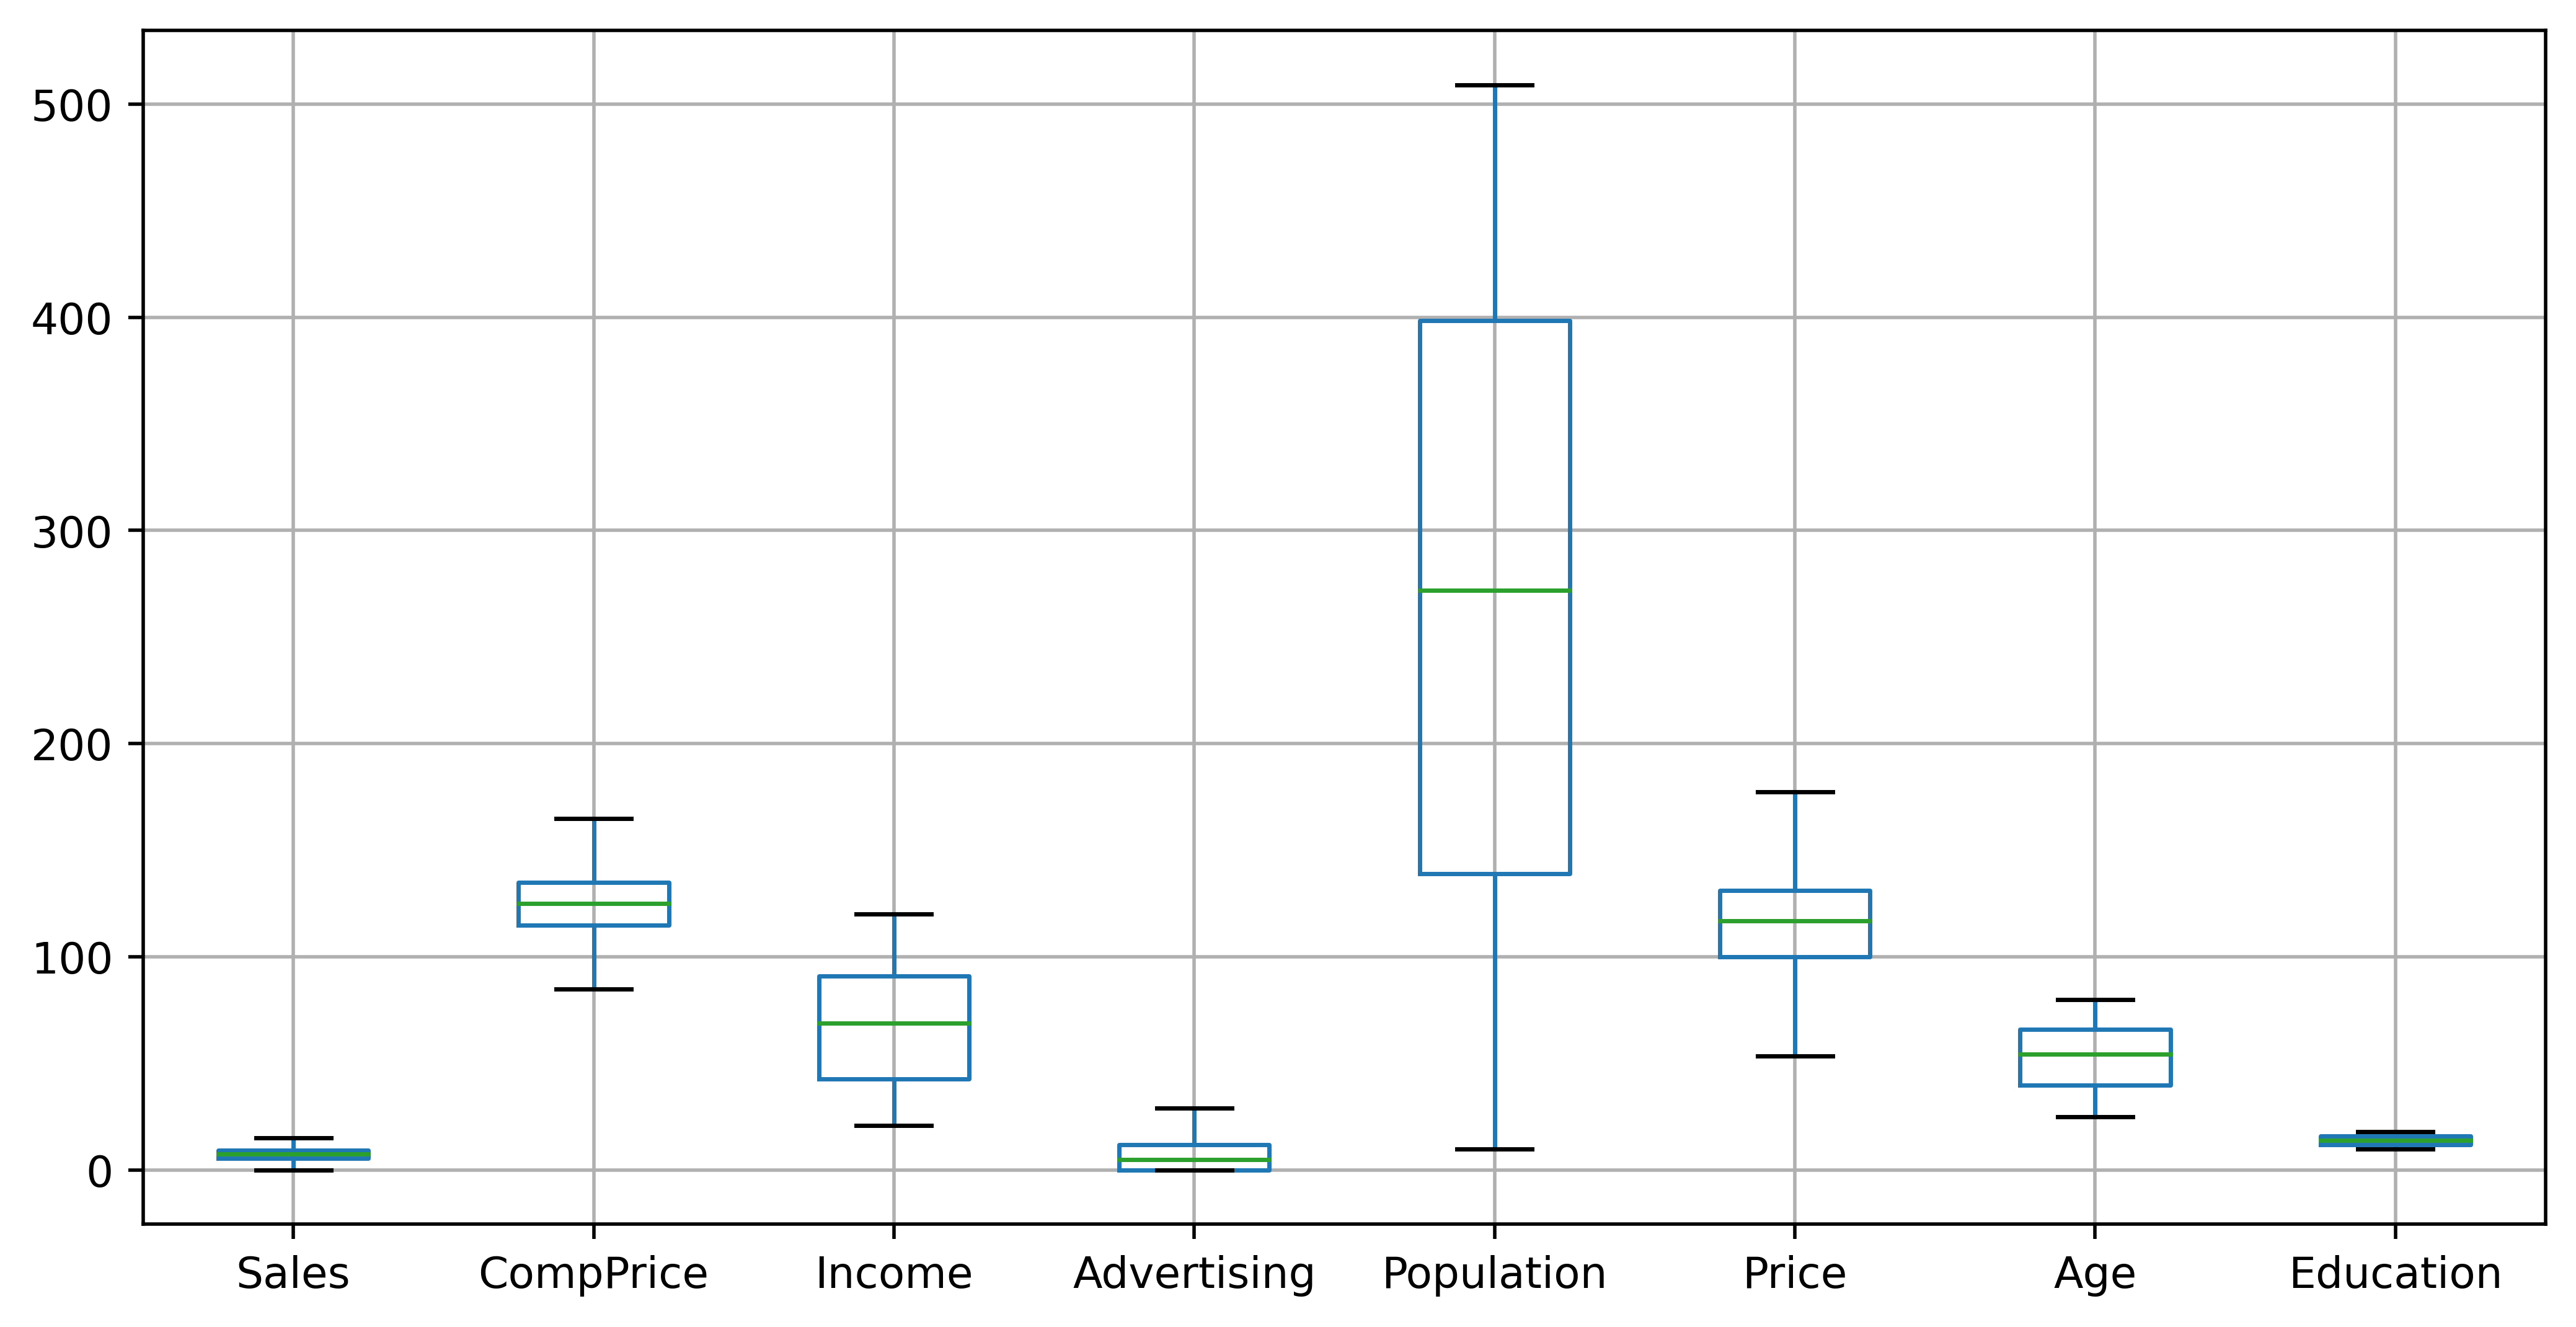

In [17]:
df.boxplot()

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [19]:
df["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [20]:
order = ["Bad", "Medium", "Good"]

oe = OrdinalEncoder(categories=[order])
df["ShelveLoc"] = oe.fit_transform(df[["ShelveLoc"]])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120.0,0.0,42,17,Yes,Yes
1,11.22,111,48,16,260,83.0,2.0,65,10,Yes,Yes
2,10.06,113,35,10,269,80.0,1.0,59,12,Yes,Yes
3,7.40,117,100,4,466,97.0,1.0,55,14,Yes,Yes
4,4.15,141,64,3,340,128.0,0.0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.0,2.0,33,14,Yes,Yes
396,6.14,139,23,3,37,120.0,1.0,55,11,No,Yes
397,7.41,162,26,12,368,159.0,1.0,40,18,Yes,Yes
398,5.94,100,79,7,284,95.0,0.0,50,12,Yes,Yes


In [21]:
df = pd.get_dummies(columns=["Urban", "US"], data = df)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120.0,0.0,42,17,0,1,0,1
1,11.22,111,48,16,260,83.0,2.0,65,10,0,1,0,1
2,10.06,113,35,10,269,80.0,1.0,59,12,0,1,0,1
3,7.40,117,100,4,466,97.0,1.0,55,14,0,1,0,1
4,4.15,141,64,3,340,128.0,0.0,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.0,2.0,33,14,0,1,0,1
396,6.14,139,23,3,37,120.0,1.0,55,11,1,0,0,1
397,7.41,162,26,12,368,159.0,1.0,40,18,0,1,0,1
398,5.94,100,79,7,284,95.0,0.0,50,12,0,1,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_No     400 non-null    uint8  
 10  Urban_Yes    400 non-null    uint8  
 11  US_No        400 non-null    uint8  
 12  US_Yes       400 non-null    uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 29.8 KB


In [24]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 0.71437627,  0.858149  ,  0.15536099, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [ 1.32649033, -0.92005691, -0.73906037, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [ 0.91366922, -0.78833795, -1.20415947, ...,  0.64686916,
        -0.74188112,  0.74188112],
       ...,
       [-0.0294135 ,  2.43877647, -1.52615116, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [-0.55255751, -1.64451117,  0.37002211, ...,  0.64686916,
        -0.74188112,  0.74188112],
       [ 0.78911112,  0.59471109, -1.13260576, ...,  0.64686916,
        -0.74188112,  0.74188112]])

In [25]:
x = df.drop(columns=["Sales"])
y = df["Sales"]

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
ypred = rfr.predict(xtest)
ypred

array([ 6.6466 ,  4.9108 ,  9.9615 ,  5.8309 ,  8.2218 ,  5.2579 ,
       10.6657 ,  7.6384 , 10.5473 ,  9.7685 ,  6.1718 ,  8.8734 ,
        9.2002 ,  6.8061 ,  7.2682 ,  8.7013 ,  6.9595 , 11.96835,
        7.9866 ,  6.3937 ,  9.2196 ,  5.0406 ,  6.7964 ,  5.3757 ,
        7.0382 ,  7.0276 ,  7.33   ,  8.1948 ,  6.7347 ,  4.2321 ,
       11.0988 , 10.6781 ,  5.9604 ,  3.8031 , 10.566  ,  5.4704 ,
        6.0489 ,  8.1348 , 10.17675,  5.0669 ,  4.1199 ,  4.9856 ,
        9.2304 , 10.5001 ,  9.3202 ,  6.8917 ,  6.6023 ,  8.2693 ,
        5.3011 ,  5.9627 , 10.74535,  8.2334 ,  7.1821 , 10.143  ,
        8.0531 ,  4.7273 ,  5.8277 , 10.4265 , 11.14865,  9.3194 ,
        8.1956 , 10.3639 ,  7.4425 ,  4.5712 ,  7.6011 ,  7.3931 ,
       10.3359 ,  7.8239 ,  6.0333 , 10.49515,  6.0522 ,  7.0085 ,
        8.873  ,  4.8408 ,  8.4643 ,  7.2105 ,  7.0832 ,  8.8905 ,
        5.8624 ,  6.7995 ])

In [28]:
rfr.score(xtrain, ytrain), rfr.score(xtest, ytest)

(0.9554003039723525, 0.7061117800173868)

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [30]:
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [31]:
best_params = grid_search.best_params_
best_params

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [32]:
rfr = RandomForestRegressor(max_depth = None,
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split = 2,
 n_estimators = 100)
 
rfr.fit(xtrain, ytrain)
ypred = rfr.predict(xtest)
ypred

array([ 6.55636354,  5.23231595, 10.14078417,  5.60579679,  8.03260738,
        5.16402893, 11.09086524,  7.02708297, 10.69582667,  9.72206476,
        6.16832833,  8.52053655,  9.25876832,  7.03266083,  6.79441857,
        8.95472321,  8.04147702, 12.02183988,  8.06654369,  6.24596857,
        9.48639865,  5.03934036,  6.74822321,  5.62273024,  6.72204627,
        7.02509607,  7.02389714,  7.84301655,  7.05207714,  4.66604476,
       11.05427262, 10.60255952,  6.18120262,  3.82744509, 10.36566071,
        4.91656083,  6.12623004,  8.39736   ,  9.89657603,  4.85093036,
        4.51582714,  5.25595107,  9.35759369, 10.441145  ,  9.1430031 ,
        6.9847844 ,  6.66062274,  8.39828238,  5.58224167,  5.78630972,
       10.53924393,  8.32602667,  7.15351405, 10.37411786,  7.86605238,
        4.48837988,  5.80435179, 10.68992655, 11.29817857,  9.21819484,
        8.4407169 , 10.09250024,  7.30762143,  4.8088996 ,  7.75900798,
        7.69424905, 10.4418323 ,  7.86776833,  6.25601214, 10.42

In [33]:
rfr.score(xtrain, ytrain), rfr.score(xtest, ytest)

(0.9330017447590779, 0.6877234656998507)